## PyTorch Resnets

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter

pp = PrettyPrinter(indent=4)
pd.set_option('display.max_rows', 50)

# get an absolute path to the directory that contains parent files
project_dir = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_PATH,
)
from experiments.utils.parser import Parser

In [2]:
series = 307
experiment_id = 1
config_key_mapper = "key_config_mapper.csv"
model_name = "yolo" # change yolo - resnet-human
series_path = os.path.join(NODE_PROFILING_RESULTS_PATH, "series", str(series))
loader = Parser(
    series_path=series_path, config_key_mapper=config_key_mapper, model_name=model_name
)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results

In [3]:
results.columns

Index(['experiment_id', 'client_to_model_avg', 'client_to_model_p99',
       'client_to_model_p95', 'client_to_model_p50', 'client_to_model_var',
       'client_to_model_max', 'client_to_model_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p95', 'model_latencies_p50',
       'model_latencies_var', 'model_latencies_max', 'model_latencies_min',
       'model_to_client_avg', 'model_to_client_p99', 'model_to_client_p95',
       'model_to_client_p50', 'model_to_client_var', 'model_to_client_max',
       'model_to_client_min', 'e2e_latencies_avg', 'e2e_latencies_p99',
       'e2e_latencies_p95', 'e2e_latencies_p50', 'e2e_latencies_var',
       'e2e_latencies_max', 'e2e_latencies_min', 'start_time', 'end_time',
       'duration', 'timeout_count', 'cpu_usage_count_avg',
       'cpu_usage_count_p99', 'cpu_usage_count_p95', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p

In [4]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'benchmark_duration': 1,
    'central_queue': False,
    'cpu_request': ['1', '2', '4', '8', '16'],
    'data_type': 'image',
    'distrpution_time': 10,
    'only_pod': True,
    'logs_enabled': False,
    'max_batch_size': ['1', '2', '4', '8', '16'],
    'max_batch_time': ['1'],
    'memory_request': ['2Gi'],
    'mode': 'exponential',
    'model_variants': ['yolov5n', 'yolov5s', 'yolov5m', 'yolov5l', 'yolov5x'],
    'node_name': 'yolo',
    'num_interop_threads': ['1'],
    'num_threads': ['1'],
    'pipeline_name': 'video',
    'repetition': 1,
    'replicas': [1],
    'series': 307,
    'series_meta': 'yolo static inter & intra (== 8)',
    'timeout': 100,
    'use_threading': 'True',
    'workload_config': {'load_duration': 60, 'loads_to_test': [64]},
    'workload_type': 'static'}


In [5]:
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas,no_engine,mode,data_type,benchmark_duration
0,1,video,yolo,yolov5n,1,2Gi,1,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
1,2,video,yolo,yolov5n,2,2Gi,1,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
2,3,video,yolo,yolov5n,4,2Gi,1,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
3,4,video,yolo,yolov5n,8,2Gi,1,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
4,5,video,yolo,yolov5n,16,2Gi,1,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,video,yolo,yolov5l,2,2Gi,2,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
82,83,video,yolo,yolov5l,4,2Gi,2,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
83,84,video,yolo,yolov5l,8,2Gi,2,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1
84,85,video,yolo,yolov5l,16,2Gi,2,1,64,60,307,yolo static inter & intra (== 8),1,False,exponential,image,1


In [15]:
# experiment_ids = key_config_df["experiment_id"].tolist()
    # (key_config_df["model_variant"] == "resnet18") & (key_config_df["cpu_request"] == 2.2)
experiment_ids = key_config_df[(key_config_df["model_variant"] == "yolov5n") & (key_config_df["load"] == 64)]["experiment_id"].tolist()
metadata_columns = ["model_variant", "max_batch_size", "cpu_request", "load"]
results_columns = [
    "model_latencies_min",
    "model_latencies_p95",
    "model_latencies_p99",
    "cpu_usage_count_avg",
    "model_latencies_avg",
    "throughput_max",
]
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns,
)

# output["expected_throughput"] = (
#     1 / output["model_latencies_avg"] * output["max_batch_size"]
# )
# output.sort_values(by='throughput')
display(output)

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
0,yolov5m,1,1,64,1.399619,2.003797,2.479204,18.191836,1.662801,0.000000
1,yolov5m,1,2,64,0.403673,0.635355,0.742975,26.414898,0.528619,1.001601
2,yolov5m,1,4,64,0.117270,0.201489,0.218197,1286.661781,0.186600,5.252544
3,yolov5m,1,8,64,0.068315,0.079967,0.090183,952.310377,0.072869,13.370629
4,yolov5m,1,16,64,0.067438,0.082041,0.090628,1072.195338,0.077290,12.575658
5,yolov5m,2,1,64,1.795572,3.401183,3.482611,89.345000,2.775193,NaN
6,yolov5m,2,2,64,0.500642,0.983844,1.082636,1599.633977,0.839403,2.343579
7,yolov5m,2,4,64,0.226202,0.362053,0.378083,1130.485087,0.305013,6.417850
8,yolov5m,2,8,64,0.113134,0.140641,0.149994,888.449407,0.131727,14.669231
9,yolov5m,2,16,64,0.115175,0.138871,0.148965,827.563156,0.130635,14.832685


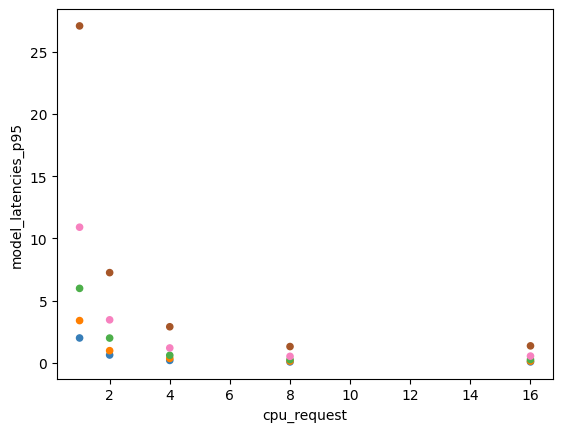

In [16]:
color = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

ax = output.plot.scatter(
    x="cpu_request", y="model_latencies_p95", c=output['max_batch_size'].map({1:color[0], 2:color[1], 4:color[2], 8:color[3], 16:color[4], 32:color[5]}), style="o-"
)


In [14]:
display(output[output['cpu_request']==1])

,model_variant,max_batch_size,cpu_request,load,model_latencies_min,model_latencies_p95,model_latencies_p99,cpu_usage_count_avg,model_latencies_avg,throughput_max
0,yolov5s,1,1,64,0.702351,1.023735,1.265081,54.044946,0.879296,1.055279
5,yolov5s,2,1,64,0.691001,1.589757,1.791144,599.916813,1.343663,1.443001
10,yolov5s,4,1,64,0.888646,2.988590,3.587144,244.496354,2.523521,1.493228
15,yolov5s,8,1,64,0.590592,5.379338,6.605602,255.971452,3.171245,1.578289
20,yolov5s,16,1,64,0.788549,12.434102,13.507959,91.928734,5.295454,1.507258
